# HLT Assignment

## HLT GROUP D

### Michael NANA KAMENI

### Olisa IGWEBIKE 

### Oloruntoba SEUN

### Rabiu BALA

In addition to practising the process of loading data, regularizing it and using it to train a model, the goal of this assignment is to investigat the effect of changing model parameters on the performance.

In [1]:
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Step 1: loading the data

We'll be going a bit further with the robot collision dataset. This time, instead of looking at just the first file, we'll look at all five different tasks combined (lp1.data to lp5.data). Prepare two different arrays, X1 and X2, as follows:
- Each element in X1 is the immediate reading of the force and torque values after an event, [f1, f2, f3, t1, t2, t3]. The first element should be [1, 1, 63, -3, -1, 0]
- Each element in X2 contains 18 values in total - the first, fifth and tenth sets of sensor readings after an event. The first element should be [-1, -1, 63, -3, -1, 0, -1, -1, 63, -3, -1, 0, -1, -1, 61, -3, 0, 0]

y should contain the corresponding classes, represented as integers according the the provided dictionary

In [2]:
files = ['robot_execution_failure/lp1.data', 'robot_execution_failure/lp2.data',
'robot_execution_failure/lp3.data', 'robot_execution_failure/lp4.data', 'robot_execution_failure/lp5.data']
classes = {'normal':0, 'collision':1, 'obstruction':2, 'fr_collision':3}

In [3]:
filename = 'combine_files.csv'               # assign to filename a csv filename 
with open(filename, 'w+') as combination:     # open the filename as combination 
    for file in files:                       # iterate on the different dataset files
        with open(file) as f:                # open each dataset file as f
            combination.write(f.read())      # write the content of each on combine_files

In [4]:
f1 = open('combine_files.csv')
lines = f1.readlines() 
lines[:5]

['normal\n',
 '\t-1\t-1\t63\t-3\t-1\t0\n',
 '\t0\t0\t62\t-3\t-1\t0\n',
 '\t-1\t-1\t61\t-3\t0\t0\n',
 '\t-1\t-1\t63\t-2\t-1\t0\n']

In [5]:
X1 = [] # inputs
y = [] # true values
classes = {'normal':0, 'collision':1, 'obstruction':2, 'fr_collision':3} # Encoding the classes as integers

# Here, we iterate over the lines of the file. If a line matches one of our classes, we split the next line 
# to get the six readings and use those as our features. 
for i in range(len(lines) - 1):
    line = lines[i].strip() # .strip() removes the line endings \n
    if line in classes.keys(): # If the line matches one of our classes (for eg, 'normal')
        features = [int(x) for x in lines[i+1].strip().split('\t')] # Split the next line to get our features
        X1.append(features)
        y.append(classes[line]) # And record which class this set of features belongs to

In [6]:
X1 = np.array(X1)
X1

array([[-1, -1, 63, -3, -1,  0],
       [-1, -1, 63, -2, -1,  0],
       [-1,  0, 57, -5, -3,  0],
       ...,
       [-4,  0,  8,  6, -2,  2],
       [-4,  0,  8,  6, -2,  2],
       [-4,  0,  7,  5,  0,  2]])

In [7]:
X2 = [] # inputs
y = [] # true values
classes = {'normal':0, 'collision':1, 'obstruction':2, 'fr_collision':3} # Encoding the classes as integers

# Here, we iterate over the lines of the file. If a line matches one of our classes, we split the next line 
# to get the six readings and use those as our features. 
for i in range(len(lines) - 1):
    line = lines[i].strip() # .strip() removes the line endings \n
    if line in classes.keys(): # If the line matches one of our classes (for eg, 'normal')
        a = [int(x) for x in lines[i+1].strip().split('\t')] # Split the first next five lines 
        b = [int(x) for x in lines[i+5].strip().split('\t')] # Split the next five lines from the fifth
        c = [int(x) for x in lines[i+10].strip().split('\t')] # Split the next five lines from the tenth
        X2.append(a + b + c)
        y.append(classes[line]) # And record which class this set of features belongs to

In [7]:
import pandas as pd
column = ['f1', 'f2', 'f3', 't1', 't2', 't3', 'f4', 'f5', 'f6', 't4', 't5', 't6', 'f7', 'f8', 'f9', 't7', 't8', 't9']
X2 = pd.DataFrame(X2, columns =column)
X2

,f1,f2,f3,t1,t2,t3,f4,f5,f6,t4,t5,t6,f7,f8,f9,t7,t8,t9
0,-1,-1,63,-3,-1,0,-1,-1,63,-3,-1,0,-1,-1,61,-3,0,0
1,-1,-1,63,-2,-1,0,0,-1,59,-2,0,-1,0,-3,66,1,4,0
2,-1,0,57,-5,-3,0,-1,-1,65,-6,1,0,1,-3,65,-1,1,0
3,0,-1,59,-2,-1,-1,-1,1,62,-7,1,-1,-1,2,58,-8,-4,0
4,0,-2,65,-4,-2,0,-2,3,57,-12,-4,-1,-1,2,60,-10,-5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,-4,1,7,5,-2,2,-5,1,7,5,-2,2,-4,2,7,3,-1,2
265,-4,0,7,5,-2,2,-4,1,8,5,-3,2,-4,-1,12,5,1,2
266,-4,0,8,6,-2,2,-3,0,8,4,-2,3,-3,0,2,4,-1,1
267,-4,0,8,6,-2,2,-4,1,7,5,-2,2,-6,1,5,5,-6,1


In [8]:
import pandas as pd
X1 = pd.DataFrame(X1, columns = ['f1', 'f2', 'f3', 't1', 't2', 't3'])
X1

,f1,f2,f3,t1,t2,t3
0,-1,-1,63,-3,-1,0
1,-1,-1,63,-2,-1,0
2,-1,0,57,-5,-3,0
3,0,-1,59,-2,-1,-1
4,0,-2,65,-4,-2,0
...,...,...,...,...,...,...
264,-4,1,7,5,-2,2
265,-4,0,7,5,-2,2
266,-4,0,8,6,-2,2
267,-4,0,8,6,-2,2


In [9]:
import pandas as pd
column = ['f1', 'f2', 'f3', 't1', 't2', 't3', 'f4', 'f5', 'f6', 't4', 't5', 't6', 'f7', 'f8', 'f9', 't7', 't8', 't9']
X2 = pd.DataFrame(X2, columns = column)
X2

,f1,f2,f3,t1,t2,t3,f4,f5,f6,t4,t5,t6,f7,f8,f9,t7,t8,t9
0,-1,-1,63,-3,-1,0,-1,-1,63,-3,-1,0,-1,-1,61,-3,0,0
1,-1,-1,63,-2,-1,0,0,-1,59,-2,0,-1,0,-3,66,1,4,0
2,-1,0,57,-5,-3,0,-1,-1,65,-6,1,0,1,-3,65,-1,1,0
3,0,-1,59,-2,-1,-1,-1,1,62,-7,1,-1,-1,2,58,-8,-4,0
4,0,-2,65,-4,-2,0,-2,3,57,-12,-4,-1,-1,2,60,-10,-5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,-4,1,7,5,-2,2,-5,1,7,5,-2,2,-4,2,7,3,-1,2
265,-4,0,7,5,-2,2,-4,1,8,5,-3,2,-4,-1,12,5,1,2
266,-4,0,8,6,-2,2,-3,0,8,4,-2,3,-3,0,2,4,-1,1
267,-4,0,8,6,-2,2,-4,1,7,5,-2,2,-6,1,5,5,-6,1


#### Let us visualise those data.

In [10]:
pd.DataFrame.hist(X2, figsize = [15,15]) 

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/mich

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111ffa710>,
      dtype=object)

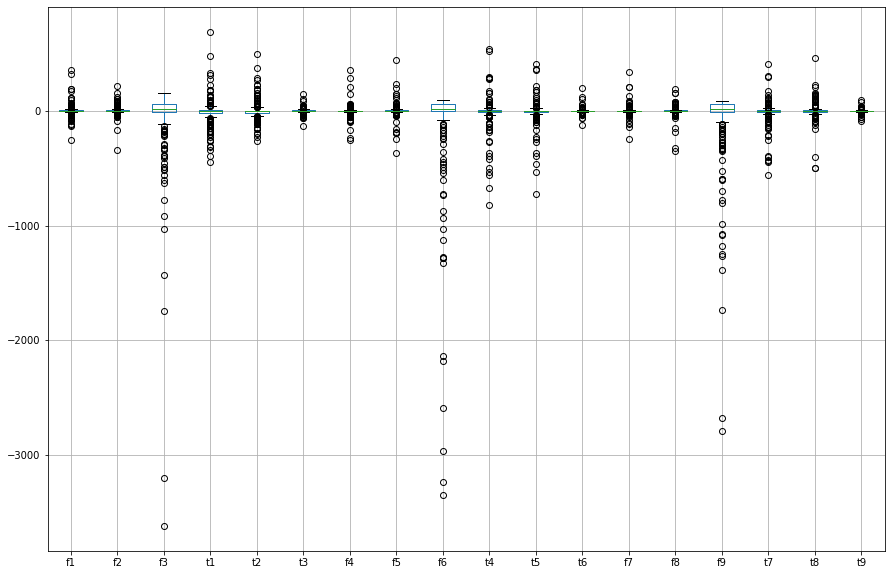

In [11]:
pd.DataFrame.boxplot(X2, figsize=(15,10))

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/mich

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1143e4d90>,
      dtype=object)

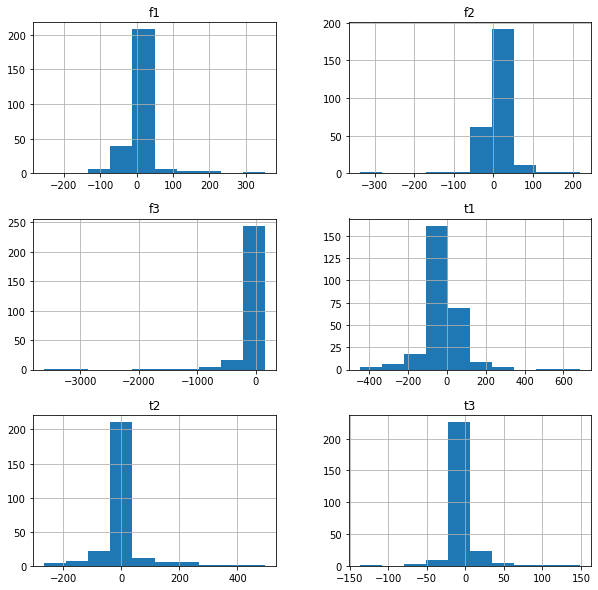

In [12]:
pd.DataFrame.hist(X1, figsize=(10,10))

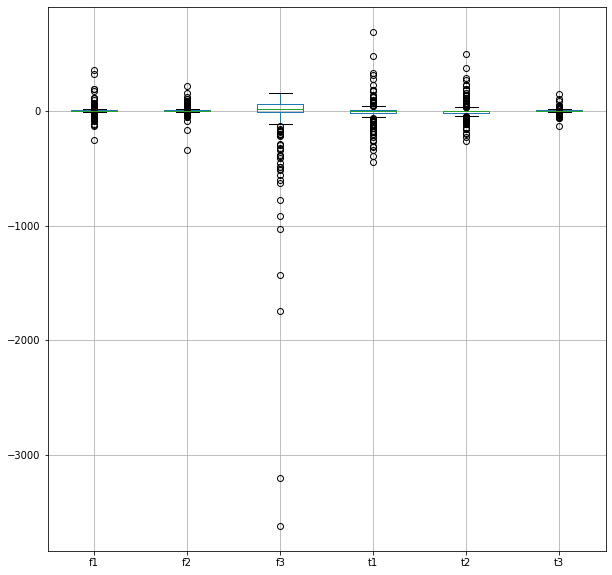

In [13]:
pd.DataFrame.boxplot(X1, figsize=(10,10))

## Step 2: establishing a baseline

Using techniques covered in this unit, split X1 and y into separate training and testing sets. Use the training set to train a neural network (MLPClassifier) using default parameters but with hidden_layer_sizes=(20, 20, 20). Use the test data you held back to score the model you have created. How well does it perform? Print out the score and confusion matrix. For more accuracy, run through these steps 10 times and find the average score - bonus points for running more times and getting a standard deviation!

#### Let us first split data into training and test set.

In [14]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [15]:
X1_train.shape

(215, 6)

#### import useful library

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier as MLPC

In [17]:
# Preparing and scaling the inputs
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test  = scaler.transform(X1_test)

In [18]:
# Creating the neural network
mlp = MLPC(hidden_layer_sizes=(20,20,20))

In [19]:
# let us fit or train data
mlp.fit(X1_train, y_train)

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

#### How well does it perform? Print out the score and confusion matrix. 

In [20]:
# Use test set to set back the score
prediction = mlp.predict(X1_test)

In [21]:
# The score - pretty good! ~96% accuracy (will vary depending on the random weights the model started with)
print(mlp.score(X1_test, y_test))
# The confusion matrix gives a better picture of what errors are slipping in
print(confusion_matrix(y_test,prediction))

0.7777777777777778
[[23  0  0  0]
 [ 1 13  4  0]
 [ 1  3  6  0]
 [ 1  2  0  0]]


If you're getting a convergence warning, you could try having the model train over more iterations - change max_iter = 1000 or 10,000. Does this improve the average score?

In [22]:
max_iter1 = 50
score = []
for i in range(1,11):
    mlp = MLPC(hidden_layer_sizes=(20,20,20), max_iter = max_iter1*i)
    mlp.fit(X1_train, y_train)
    predic = mlp.predict(X1_test)
    score.append(mlp.score(X1_test, y_test))
    # The confusion matrix gives a better picture of what errors are slipping in
    print(confusion_matrix(y_test, predic))

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [11  7  0  0]
 [ 5  2  3  0]
 [ 3  0  0  0]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 6  8  4  0]
 [ 3  2  5  0]
 [ 2  1  0  0]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 2 12  4  0]
 [ 1  2  7  0]
 [ 1  2  0  0]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 1 15  2  0]
 [ 1  5  4  0]
 [ 2  1  0  0]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 1 13  4  0]
 [ 1  4  5  0]
 [ 1  1  1  0]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 2 14  1  1]
 [ 1  6  3  0]
 [ 1  0  1  1]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 1 15  1  1]
 [ 1  6  3  0]
 [ 1  1  0  1]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 1 15  2  0]
 [ 1  3  6  0]
 [ 1  1  0  1]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (450) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 1 11  6  0]
 [ 1  4  5  0]
 [ 1  1  0  1]]
[[22  0  0  1]
 [ 1 12  3  2]
 [ 1  5  4  0]
 [ 1  0  1  1]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [23]:
score

[0.6111111111111112,
 0.6666666666666666,
 0.7777777777777778,
 0.7777777777777778,
 0.7592592592592593,
 0.7592592592592593,
 0.7777777777777778,
 0.8333333333333334,
 0.7407407407407407,
 0.7222222222222222]

In [24]:
import statistics
statistics.mean(score)

0.7425925925925926

For sure the mean score has ameliorated the score value  

## Step 3: adding more inputs

Use X2 in place of X1 - does the score increase or decrease? Was this what you expected? How many samples are there in our training set?

In [25]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [26]:
X2_train.shape

(215, 18)

In [27]:
# Preparing and scaling the inputs
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test  = scaler.transform(X2_test)

In [28]:
# Creating the neural network
mlp = MLPC(hidden_layer_sizes=(20,20,20))

In [29]:
# Let us fit or tain data
mlp.fit(X2_train, y_train)

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [30]:
# Use test set to set back the score
predictions = mlp.predict(X2_test)

In [31]:
# The score - pretty good! ~96% accuracy (will vary depending on the random weights the model started with)
print(mlp.score(X2_test, y_test))
# The confusion matrix gives a better picture of what errors are slipping in
print(confusion_matrix(y_test,predictions))

0.8148148148148148
[[23  0  0  0]
 [ 1 16  1  0]
 [ 1  4  5  0]
 [ 1  2  0  0]]


In [32]:
max_iter1 = 50
score = []
for i in range(1,11):
    mlp = MLPC(hidden_layer_sizes=(20,20,20), max_iter = max_iter1*i)
    mlp.fit(X2_train, y_train)
    pred = mlp.predict(X2_test)
    score.append(mlp.score(X2_test, y_test))
    # The confusion matrix gives a better picture of what errors are slipping in
    print(confusion_matrix(y_test, pred))

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [10  7  1  0]
 [ 3  1  6  0]
 [ 2  1  0  0]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 4 13  1  0]
 [ 2  2  6  0]
 [ 2  1  0  0]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 2 15  1  0]
 [ 1  2  7  0]
 [ 1  2  0  0]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 0 17  1  0]
 [ 1  2  7  0]
 [ 1  2  0  0]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 1 16  1  0]
 [ 1  4  5  0]
 [ 1  1  0  1]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 1 15  2  0]
 [ 1  4  5  0]
 [ 1  1  0  1]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 1 16  1  0]
 [ 1  4  5  0]
 [ 1  1  0  1]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 1 16  1  0]
 [ 1  3  6  0]
 [ 1  1  0  1]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (450) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 1 14  2  1]
 [ 1  3  6  0]
 [ 1  1  0  1]]
[[23  0  0  0]
 [ 0 15  1  2]
 [ 1  4  5  0]
 [ 1  1  0  1]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [33]:
statistics.mean(score)

0.8111111111111111

## Step 4: feature engineering

Back to X1 as our input. Add an extra feature to each item in the array to represent the total force $f_t$. Assume:

$f_t^2 = f_1^2 + f_2^2 + f_3^2$

Your first input should now look like this:
X1[0] = [-1, -1, 61, -3, 0, 0, 61.0163912403872]

### Let us proceed feature selection 

In [34]:
import numpy as np
X12 = []
y = [] # true values
classes = {'normal':0, 'collision':1, 'obstruction':2, 'fr_collision':3} # Encoding the classes as integers

# Here, we iterate over the lines of the file. If a line matches one of our classes, we split the next line 
# to get the six readings and use those as our features. 
for i in range(len(lines) - 1):
    line = lines[i].strip() # .strip() removes the line endings \n
    if line in classes.keys(): # If the line matches one of our classes (for eg, 'normal')
        a = [int(x) for x in lines[i+10].strip().split('\t')] # Split the first next five lines 
        X12.append(a)
        y.append(classes[line]) # And record which class this set of features belongs to

In [35]:
import pandas as pd
X12 = pd.DataFrame(X12, columns = ['f7', 'f8', 'f9', 't7', 't8', 't9'])
X12

,f7,f8,f9,t7,t8,t9
0,-1,-1,61,-3,0,0
1,0,-3,66,1,4,0
2,1,-3,65,-1,1,0
3,-1,2,58,-8,-4,0
4,-1,2,60,-10,-5,0
...,...,...,...,...,...,...
264,-4,2,7,3,-1,2
265,-4,-1,12,5,1,2
266,-3,0,2,4,-1,1
267,-6,1,5,5,-6,1


In [36]:
import numpy as np
X1_new = []
force_squared = X12['f7']**2+X12['f8']**2+X12['f9']**2
X1_new.append(np.sqrt(force_squared))
y1 = pd.DataFrame(X1_new[0])

In [37]:
X12['ft']= y1
X12

,f7,f8,f9,t7,t8,t9,ft
0,-1,-1,61,-3,0,0,61.016391
1,0,-3,66,1,4,0,66.068147
2,1,-3,65,-1,1,0,65.076878
3,-1,2,58,-8,-4,0,58.043087
4,-1,2,60,-10,-5,0,60.041652
...,...,...,...,...,...,...,...
264,-4,2,7,3,-1,2,8.306624
265,-4,-1,12,5,1,2,12.688578
266,-3,0,2,4,-1,1,3.605551
267,-6,1,5,5,-6,1,7.874008


In [38]:
# Let us split data into train and test set
X1_train, X1_test, y_train, y_test = train_test_split(X12, y, test_size=0.2, random_state = 42) 

In [39]:
# Let us scale data
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [40]:
# Let's create a model
mpl = MLPC(hidden_layer_sizes=(20,20,20))

In [41]:
# fit the model
mpl.fit(X1_train, y_train)
# Use test set to set back the score
prediction = mpl.predict(X1_test)

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [42]:
# The score - pretty good! ~96% accuracy (will vary depending on the random weights the model started with)
print(mpl.score(X1_test, y_test))
# The confusion matrix gives a better picture of what errors are slipping in
print(confusion_matrix(y_test,prediction))

0.5
[[10 13  0  0]
 [ 4 12  2  0]
 [ 1  4  5  0]
 [ 1  2  0  0]]


Repeat the steps from step 2. *Has this extra feature improved model performance?*

In [43]:
max_iter1 = 50
score = []
for i in range(1,11, 2):
    mpl = MLPC(hidden_layer_sizes=(20,20,20), max_iter = max_iter1*i)
    mpl.fit(X1_train, y_train)
    predict = mpl.predict(X1_test)
    score.append(mpl.score(X1_test, y_test))
    # The confusion matrix gives a better picture of what errors are slipping in
    print(confusion_matrix(y_test, predict))

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [15  2  1  0]
 [ 4  2  4  0]
 [ 2  1  0  0]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 7 10  1  0]
 [ 1  4  5  0]
 [ 1  1  1  0]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[22  1  0  0]
 [ 7  9  2  0]
 [ 1  3  6  0]
 [ 1  2  0  0]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 5 12  1  0]
 [ 2  4  4  0]
 [ 1  1  0  1]]
[[22  1  0  0]
 [ 4 12  2  0]
 [ 1  4  5  0]
 [ 1  0  1  1]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (450) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [44]:
score

[0.5370370370370371,
 0.7037037037037037,
 0.6851851851851852,
 0.7407407407407407,
 0.7407407407407407]

In [45]:
import statistics
statistics.mean(score)

0.6814814814814815

## Step 5: exploring

Create at least 3 more models, adding features or changing the number and size of the hidden layers. Print out the average score for your best model. Comment on what you've found.

In [46]:
f1 = open('combine_files.csv')
lines = f1.readlines() 
lines[:5]

['normal\n',
 '\t-1\t-1\t63\t-3\t-1\t0\n',
 '\t0\t0\t62\t-3\t-1\t0\n',
 '\t-1\t-1\t61\t-3\t0\t0\n',
 '\t-1\t-1\t63\t-2\t-1\t0\n']

### Let us first add features and have a deeper look

In [47]:
X1 = [] # inputs
y = [] # true values
classes = {'normal':0, 'collision':1, 'obstruction':2, 'fr_collision':3} # Encoding the classes as integers

# Here, we iterate over the lines of the file. If a line matches one of our classes, we split the next line 
# to get the six readings and use those as our features. 
for i in range(len(lines) - 1):
    line = lines[i].strip() # .strip() removes the line endings \n
    if line in classes.keys(): # If the line matches one of our classes (for eg, 'normal')
        features = [int(x) for x in lines[i+5].strip().split('\t')] # Split the next line to get our features
        featur = [int(x) for x in lines[i+10].strip().split('\t')]
        X1.append(features + featur)
        y.append(classes[line]) # And record which class this set of features belongs to

In [48]:
df = pd.DataFrame(X1, columns = ['f4', 'f5', 'f6', 't4', 't5', 't6', 'f7', 'f8', 'f9', 't7', 't8', 't9'])
df

,f4,f5,f6,t4,t5,t6,f7,f8,f9,t7,t8,t9
0,-1,-1,63,-3,-1,0,-1,-1,61,-3,0,0
1,0,-1,59,-2,0,-1,0,-3,66,1,4,0
2,-1,-1,65,-6,1,0,1,-3,65,-1,1,0
3,-1,1,62,-7,1,-1,-1,2,58,-8,-4,0
4,-2,3,57,-12,-4,-1,-1,2,60,-10,-5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
264,-5,1,7,5,-2,2,-4,2,7,3,-1,2
265,-4,1,8,5,-3,2,-4,-1,12,5,1,2
266,-3,0,8,4,-2,3,-3,0,2,4,-1,1
267,-4,1,7,5,-2,2,-6,1,5,5,-6,1


In [49]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size =0.2, random_state=42) 

In [50]:
# Preparing and scaling the inputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [51]:
# Create a model
mlp = MLPC(hidden_layer_sizes=(20, 20, 20))

In [52]:
# Fit the model
mlp.fit(X_train, y_train)

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [53]:
#  Use test set to set back the score
predictions1 = mlp.predict(X_test)

In [54]:
# The score - pretty good! ~96% accuracy (will vary depending on the random weights the model started with)
print(mlp.score(X_test, y_test))
# The confusion matrix gives a better picture of what errors are slipping in
print(confusion_matrix(y_test,predictions1))

0.7777777777777778
[[23  0  0  0]
 [ 4 13  1  0]
 [ 1  4  5  0]
 [ 1  1  0  1]]


In [55]:
max_iter1 = 100
score = []
for i in range(1,11, 2):
    mlp = MLPC(hidden_layer_sizes=(20,20,20,), max_iter = max_iter1*i)
    mlp.fit(X_train, y_train)
    predict = mlp.predict(X_test)
    score.append(mlp.score(X_test, y_test))
    # The confusion matrix gives a better picture of what errors are slipping in
    print(confusion_matrix(y_test, predict))

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 9  8  1  0]
 [ 2  3  5  0]
 [ 2  1  0  0]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 4 13  1  0]
 [ 1  4  5  0]
 [ 1  1  0  1]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 2 14  1  1]
 [ 1  5  4  0]
 [ 1  1  0  1]]
[[23  0  0  0]
 [ 2 15  1  0]
 [ 1  3  6  0]
 [ 1  1  0  1]]
[[22  1  0  0]
 [ 2 15  1  0]
 [ 1  4  5  0]
 [ 1  1  0  1]]


In [56]:
score

[0.6666666666666666,
 0.7777777777777778,
 0.7777777777777778,
 0.8333333333333334,
 0.7962962962962963]

In [57]:
statistics.mean(score)

0.7703703703703704

### Let us reduce a little bit the number of features

In [58]:
X1 = [] # inputs
y = [] # true values
classes = {'normal':0, 'collision':1, 'obstruction':2, 'fr_collision':3} # Encoding the classes as integers

# Here, we iterate over the lines of the file. If a line matches one of our classes, we split the next line 
# to get the six readings and use those as our features. 
for i in range(len(lines) - 1):
    line = lines[i].strip() # .strip() removes the line endings \n
    if line in classes.keys(): # If the line matches one of our classes (for eg, 'normal')
        features = [int(x) for x in lines[i+1].strip().split('\t')] # Split the next line to get our features
        X1.append(features)
        y.append(classes[line]) # And record which class this set of features belongs to

In [59]:
df = pd.DataFrame(X1, columns = ['f1', 'f2', 'f3', 't1', 't2', 't3'])

In [60]:
# Let us split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state=42)

In [61]:
# Let us scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
# Create a model
mpl = MLPC(hidden_layer_sizes =(20,20,20))

In [63]:
# Fit the model
mpl.fit(X_train, y_train)

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [64]:
#  Use test set to set back the score
prediction2 =mpl.predict(X_test)

In [65]:
# The score - pretty good! ~96% accuracy (will vary depending on the random weights the model started with)
print(mpl.score(X_test, y_test))
# The confusion matrix gives a better picture of what errors are slipping in
print(confusion_matrix(y_test,prediction2))

0.7777777777777778
[[23  0  0  0]
 [ 1 14  3  0]
 [ 1  4  5  0]
 [ 1  2  0  0]]


In [66]:
max_iter1 = 100
score = []
for i in range(1,11, 2):
    mlp = MLPC(hidden_layer_sizes=(20,20,20), max_iter = max_iter1*i)
    mlp.fit(X_train, y_train)
    predict = mlp.predict(X_test)
    score.append(mlp.score(X_test, y_test))
    # The confusion matrix gives a better picture of what errors are slipping in
    print(confusion_matrix(y_test, predict))

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 6 12  0  0]
 [ 4  1  5  0]
 [ 2  1  0  0]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 1 15  2  0]
 [ 1  3  6  0]
 [ 1  1  0  1]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[22  0  0  1]
 [ 1 13  4  0]
 [ 1  4  5  0]
 [ 1  1  1  0]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[21  0  0  2]
 [ 1 12  2  3]
 [ 1  5  4  0]
 [ 1  0  1  1]]
[[22  0  0  1]
 [ 1 12  3  2]
 [ 1  2  7  0]
 [ 1  0  1  1]]


In [67]:
score

[0.7407407407407407,
 0.8333333333333334,
 0.7407407407407407,
 0.7037037037037037,
 0.7777777777777778]

In [68]:
statistics.mean(score)

0.7592592592592593

### Let us then add the number of hidden layers

In [69]:
max_iter1 = 1000
score = []
for i in range(1,11, 2):
    mlp = MLPC(hidden_layer_sizes=(30,30,30), max_iter = max_iter1*i)
    mlp.fit(X_train, y_train)
    predict = mlp.predict(X_test)
    score.append(mlp.score(X_test, y_test))
    # The confusion matrix gives a better picture of what errors are slipping in
    print(confusion_matrix(y_test, predict))

[[22  0  0  1]
 [ 1 12  3  2]
 [ 1  4  5  0]
 [ 1  1  0  1]]
[[22  0  0  1]
 [ 1 13  2  2]
 [ 1  5  4  0]
 [ 1  1  0  1]]
[[22  0  0  1]
 [ 1 11  4  2]
 [ 1  5  4  0]
 [ 1  1  0  1]]
[[22  0  0  1]
 [ 1 12  3  2]
 [ 1  5  4  0]
 [ 1  0  1  1]]
[[20  0  0  3]
 [ 1 11  4  2]
 [ 1  5  4  0]
 [ 1  1  0  1]]


In [70]:
score

[0.7407407407407407,
 0.7407407407407407,
 0.7037037037037037,
 0.7222222222222222,
 0.6666666666666666]

In [71]:
statistics.mean(score)

0.7148148148148148

In [72]:
max_iter1 = 1000
score = []
for i in range(1,11, 2):
    mlp = MLPC(hidden_layer_sizes=(40,40,40), max_iter = max_iter1*i)
    mlp.fit(X_train, y_train)
    predict = mlp.predict(X_test)
    score.append(mlp.score(X_test, y_test))
    # The confusion matrix gives a better picture of what errors are slipping in
    print(confusion_matrix(y_test, predict))

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23  0  0  0]
 [ 2 14  2  0]
 [ 1  4  5  0]
 [ 2  1  0  0]]


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[22  0  0  1]
 [ 1 12  2  3]
 [ 1  6  3  0]
 [ 1  1  0  1]]
[[22  0  0  1]
 [ 1 12  1  4]
 [ 1  4  5  0]
 [ 1  1  0  1]]
[[22  0  0  1]
 [ 1 10  4  3]
 [ 1  2  7  0]
 [ 1  0  1  1]]
[[19  0  0  4]
 [ 1  9  6  2]
 [ 1  4  5  0]
 [ 1  1  0  1]]


In [73]:
score

[0.7777777777777778,
 0.7037037037037037,
 0.7407407407407407,
 0.7407407407407407,
 0.6296296296296297]

In [74]:
statistics.mean(score)

0.7185185185185186

$\neq$